In [1]:
from mip import Model, xsum, minimize,maximize, BINARY
import numpy as np

Using Python-MIP package version 1.7.3


In [2]:
numIterations = 40
logObj = np.zeros(numIterations)
def myOpt(iteration,N):
    setN = range(N)
    M=[7,4]
    g = .05
    w1 = np.random.uniform(1,4,N)
    w2 = np.random.uniform(1/3,1,N)
    model = Model()
    x1 = model.add_var()
    x2 = model.add_var()
    z = [model.add_var(var_type=BINARY) for i in setN]
    for i in setN:
        model +=  7 - w1[i]*x1 - x2 <= M[0]*z[i]
        model +=  4 - w2[i]*x1 - x2 <= M[1]*z[i]
    model += xsum(z[i] for i in setN) <= N*g
    model.objective = minimize(x1 + x2)
    model.optimize()
    print('###############','N =',N,'###############')
    logObj[iteration-1] = model.objective_value
    print(logObj[iteration-1])
    print("x1 = {} --- x2 = {}".format(x1.x,x2.x))
    for i in setN:
        print("z{} = {}".format(i,z[i].x))
    print('######################################')

In [3]:
for iteration in range(1,numIterations+1):
    N = 10*iteration
    myOpt(iteration,N)

gurobi version 6.4 found
############### N = 10 ###############
6.933538719365959
x1 = 4.450092598022281 --- x2 = 2.4834461213436785
z0 = 0.0
z1 = 0.0
z2 = 0.0
z3 = 0.0
z4 = 0.0
z5 = 0.0
z6 = 0.0
z7 = 0.0
z8 = 0.0
z9 = 0.0
######################################
############### N = 20 ###############
6.510428339624799
x1 = 3.8495555120762512 --- x2 = 2.6608728275485474
z0 = -0.0
z1 = -0.0
z2 = 1.0
z3 = -0.0
z4 = -0.0
z5 = -0.0
z6 = -0.0
z7 = -0.0
z8 = -0.0
z9 = -0.0
z10 = -0.0
z11 = -0.0
z12 = -0.0
z13 = -0.0
z14 = -0.0
z15 = -0.0
z16 = -0.0
z17 = -0.0
z18 = -0.0
z19 = -0.0
######################################
############### N = 30 ###############
6.562167148357281
x1 = 3.9677364775992183 --- x2 = 2.5944306707580624
z0 = -0.0
z1 = -0.0
z2 = -0.0
z3 = -0.0
z4 = -0.0
z5 = -0.0
z6 = -0.0
z7 = -0.0
z8 = -0.0
z9 = -0.0
z10 = -0.0
z11 = -0.0
z12 = -0.0
z13 = -0.0
z14 = -0.0
z15 = -0.0
z16 = -0.0
z17 = -0.0
z18 = -0.0
z19 = -0.0
z20 = 1.0
z21 = -0.0
z22 = -0.0
z23 = -0.0
z24 = -0.0
z25 = -0

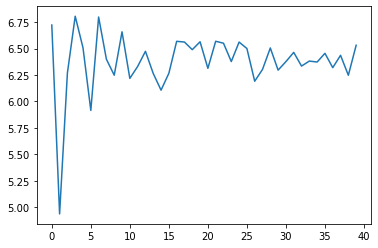

In [5]:
import matplotlib.pyplot as pt
pt.plot(logObj)

In [6]:
# if alpha in [0,1/2]
a = .05
x1_star = 9 / (11-9*(1-a))
x2_star = (41-36*(1-a))/(11-9*(1-a))
print(x1_star + x2_star)
print(x1_star)
print(x2_star)

# if alpha in [1/2,1]
# a = .95
# x1_star = 18 / (9+8*(1-a))
# x2_star = 2*(9+28*(1-a))/(9+8*(1-a))
# print(x1_star + x2_star)
# print(x1_star)
# print(x2_star)

6.448979591836734
3.6734693877551003
2.775510204081633


In [7]:
eps = .05
gamma = .05
n = 1
N_star = (2/eps)*np.log(1/gamma) + 2*n + (2*n/eps)*np.log(2/eps)
print(N_star)

269.38446910671706


In [ ]:
from gurobipy import Model,GRB
import numpy as np

In [ ]:
def myOpt2(N):
    setN = range(N)
    g = .05
    w1 = np.random.uniform(1,4,N)
    w2 = np.random.uniform(1/3,1,N)
    model = Model()
    model.setParam('OutputFlag', 0)
    model.setParam('TimeLimit', 30)
    x1 = model.addVar()
    x2 = model.addVar()
    z = model.addVars(N,vtype=GRB.BINARY)
    for i in setN:
        model.addConstr(-7*z[i] <= w1[i]*x1 + x2 - 7)
        model.addConstr(-4*z[i] <= w2[i]*x1 + x2 - 4)
    model.addConstr(sum(z[i] for i in setN) <= N*g)
    model.setObjective(x1 + x2,GRB.MINIMIZE)
    model.optimize()
    print(model.objVal)
    print("x1 = {} --- x2 = {}".format(x1.x,x2.x))
    del model

In [ ]:
for iteration in range(10):
    N = 10*iteration
    myOpt2(N)

In [ ]:
myOpt2(10000)

269.38446910671706
